In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
from pyshtools import constant
import numpy.testing as npt
import pandas as pd

In [2]:
pysh.utils.figstyle(rel_width=0.75)
%config InlineBackend.figure_format = 'retina'  # if you are not using a retina display, comment this line!

In [3]:
infile = '../data/WGS72_coeff_mod.txt'
clm = pysh.SHCoeffs.from_file(infile)
grid = clm.expand()

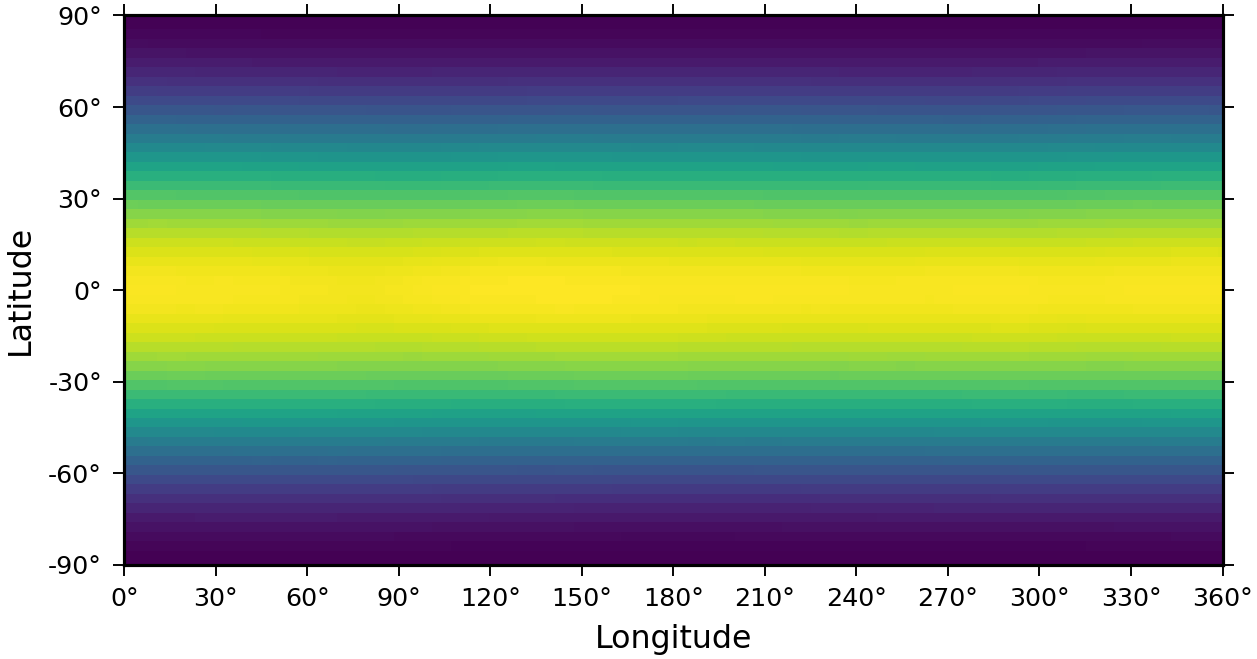

In [4]:
fig, ax = grid.plot(show=False)

## Working with EIGEN-6C4 file

The objective here is to set the file for proper importation and plotting using *pysh.SHCoeffs.from_file* command. For that we had to read the file, sort it first for the L column then for the M column. Finally, we had to change double precision 'D' string into 'e'.

In [5]:
# data = pd.read_csv('../data/EIGEN6-C4_coeff_mod.txt', sep='\t')
data = pd.read_csv('../data/EIGEN-6C4.txt', sep='\s+', skiprows=79, \
                   names=['key','L','M','C','S','sigmaC','sigmaS'])
# (latlon_terrestre)
data

,key,L,M,C,S,sigmaC,sigmaS
0,gfc,0,0,1.00000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
1,gfc,1,0,0.000000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
2,gfc,2,0,-4.84165217061e-04,0.000000000000e+00,1.1081e-13,0.0000e+00
3,gfc,3,0,9.57173592933e-07,0.000000000000e+00,6.5264e-14,0.0000e+00
4,gfc,4,0,5.39998754738e-07,0.000000000000e+00,2.9945e-14,0.0000e+00
...,...,...,...,...,...,...,...
2401331,gfc,2189,2188,0.940662561860D-14,0.297228017170D-13,0.1596D-12,0.1596D-12
2401332,gfc,2190,2188,-.837948448760D-13,-.540783234990D-13,0.1590D-12,0.1590D-12
2401333,gfc,2189,2189,0.269456819530D-13,0.164450210930D-13,0.1602D-12,0.1602D-12
2401334,gfc,2190,2189,-.377374351330D-13,0.636754603240D-13,0.1596D-12,0.1596D-12


In [6]:
data_sorted = pd.DataFrame.sort_values(data, by=['L','M'])
data_sorted = data_sorted.drop(columns=['key'],axis=1)

In [7]:
data_sorted

,L,M,C,S,sigmaC,sigmaS
0,0,0,1.00000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
1,1,0,0.000000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
2191,1,1,0.000000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
2,2,0,-4.84165217061e-04,0.000000000000e+00,1.1081e-13,0.0000e+00
2192,2,1,-3.38846075704e-10,1.46306108906e-09,3.2499e-13,3.2870e-13
...,...,...,...,...,...,...
2401325,2190,2186,0.438802473800D-13,0.259768188620D-13,0.1580D-12,0.1580D-12
2401329,2190,2187,0.530987112250D-14,-.118070836010D-13,0.1585D-12,0.1585D-12
2401332,2190,2188,-.837948448760D-13,-.540783234990D-13,0.1590D-12,0.1590D-12
2401334,2190,2189,-.377374351330D-13,0.636754603240D-13,0.1596D-12,0.1596D-12


In [8]:
data_sorted.sigmaC.values[-1]

'0.1601D-12'

In [9]:
data_sorted.sigmaC.values[-1][-4]

'D'

In [10]:
for i in range(len(data_sorted.C.values)):
    if data_sorted.C.values[i][-4] == 'D':
        print(i, data_sorted.C.values[i])
        print(i, data_sorted.S.values[i])
        print(i, data_sorted.sigmaC.values[i])
        print(i, data_sorted.sigmaS.values[i])
        break

69006 0.983749337450D-11
69006 0.000000000000D+00
69006 0.7218D-12
69006 0.0000D+00


In [11]:
print(data_sorted.C.values[69005])
print(data_sorted.S.values[69005])
print(data_sorted.sigmaC.values[69005])
print(data_sorted.sigmaS.values[69005])

-1.09835605988e-10
-8.68729563647e-11
2.1277e-11
2.1289e-11


In [12]:
len(data_sorted.C.values)

2401336

In [13]:
for i in range(69006,len(data_sorted.C.values)):
    if data_sorted.C.values[i][-4] == 'D':
        data_sorted.C.values[i]=data_sorted.C.values[i].replace('D','e')
#     if data_sorted.S.values[i][-4] == 'D':
        data_sorted.S.values[i]=data_sorted.S.values[i].replace('D','e')
#     if data_sorted.sigmaC.values[i][-4] == 'D':
        data_sorted.sigmaC.values[i]=data_sorted.sigmaC.values[i].replace('D','e')
#     if data_sorted.S.values[i][-4] == 'D':
        data_sorted.sigmaS.values[i]=data_sorted.sigmaS.values[i].replace('D','e')
    if i%200000 == 0:
        print(i)

200000
400000
600000
800000
1000000
1200000
1400000
1600000
1800000
2000000
2200000
2400000


In [14]:
data_sorted

,L,M,C,S,sigmaC,sigmaS
0,0,0,1.00000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
1,1,0,0.000000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
2191,1,1,0.000000000000e+00,0.000000000000e+00,0.0000e+00,0.0000e+00
2,2,0,-4.84165217061e-04,0.000000000000e+00,1.1081e-13,0.0000e+00
2192,2,1,-3.38846075704e-10,1.46306108906e-09,3.2499e-13,3.2870e-13
...,...,...,...,...,...,...
2401325,2190,2186,0.438802473800e-13,0.259768188620e-13,0.1580e-12,0.1580e-12
2401329,2190,2187,0.530987112250e-14,-.118070836010e-13,0.1585e-12,0.1585e-12
2401332,2190,2188,-.837948448760e-13,-.540783234990e-13,0.1590e-12,0.1590e-12
2401334,2190,2189,-.377374351330e-13,0.636754603240e-13,0.1596e-12,0.1596e-12


In [15]:
data_sorted.values[0][:4]

array([0, 0, '1.00000000000e+00', '0.000000000000e+00'], dtype=object)

In [16]:
data_sorted.keys()

Index(['L', 'M', 'C', 'S', 'sigmaC', 'sigmaS'], dtype='object')

In [17]:
L = data_sorted.L.values
M = data_sorted.M.values
C = data_sorted.C.values
S = data_sorted.S.values

In [18]:
name = open('../data/EIGEN-6C4_mod.txt','w')
for i in range(len(data_sorted.L)):
    name.write('{} \t {} \t {} \t {}\n'.format(L[i],M[i],np.float(C[i]),np.float(S[i])))
    if i%200000 == 0:
        print(i)
name.close()

0
200000
400000
600000
800000
1000000
1200000
1400000
1600000
1800000
2000000
2200000
2400000


In [19]:
infile = '../data/EIGEN-6C4_mod.txt'
clm = pysh.SHCoeffs.from_file(infile)
grid = clm.expand()

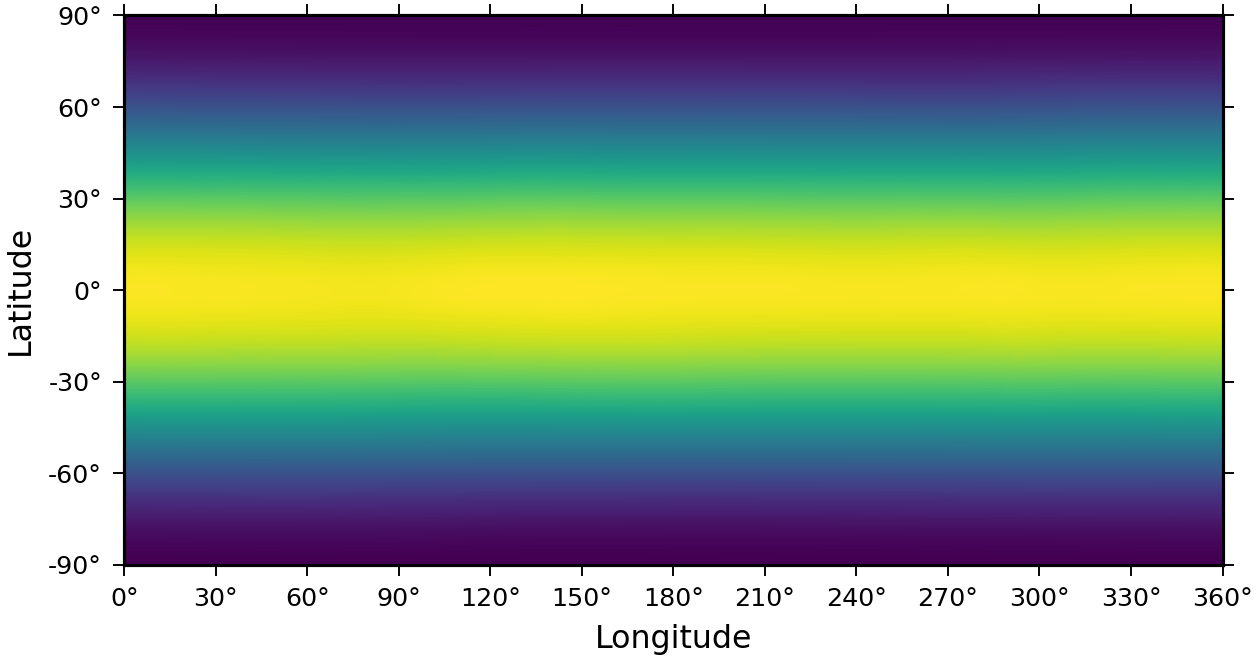

In [20]:
fig, ax = grid.plot(show=False)

In [21]:
infile = '../data/WGS72_coeff_mod.txt'
clm = pysh.SHCoeffs.from_file(infile)
grid_wgs = clm.expand()

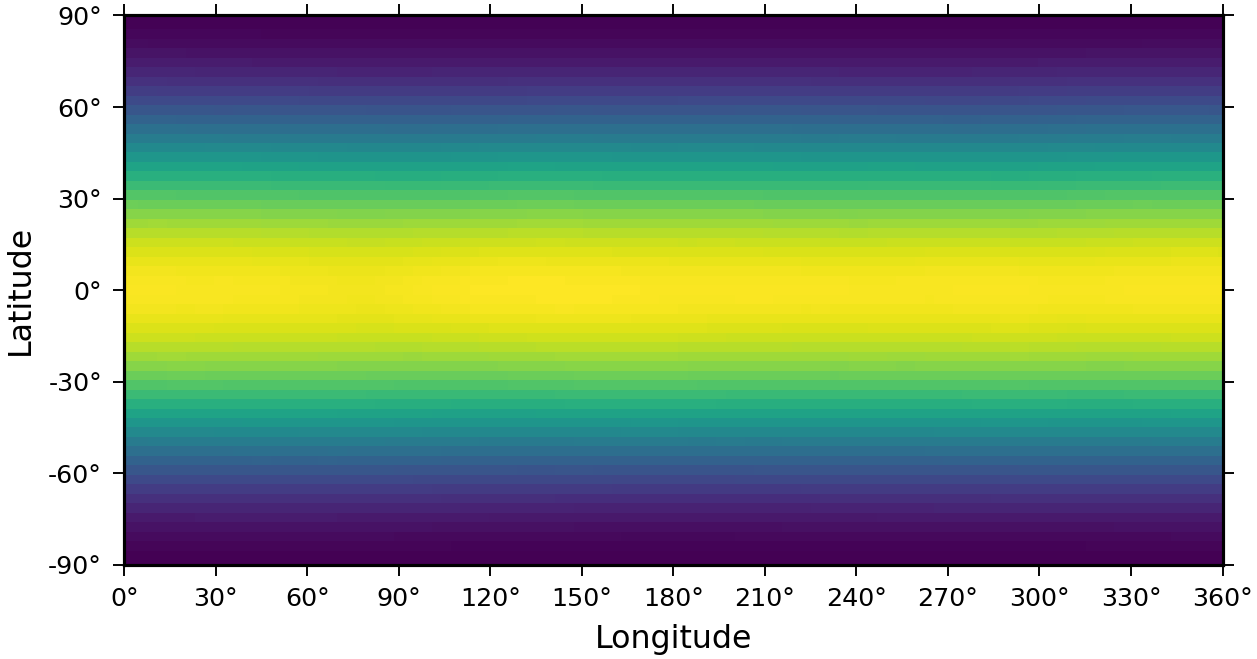

In [22]:
fig, ax = grid_wgs.plot(show=False)

In [23]:
infile = '../data/EIGEN-6C4_mod.txt'
clm = pysh.SHCoeffs.from_file(infile)
grid_eigen = clm.expand()

In [24]:
type(clm)

pyshtools.shclasses.shcoeffsgrid.SHRealCoeffs

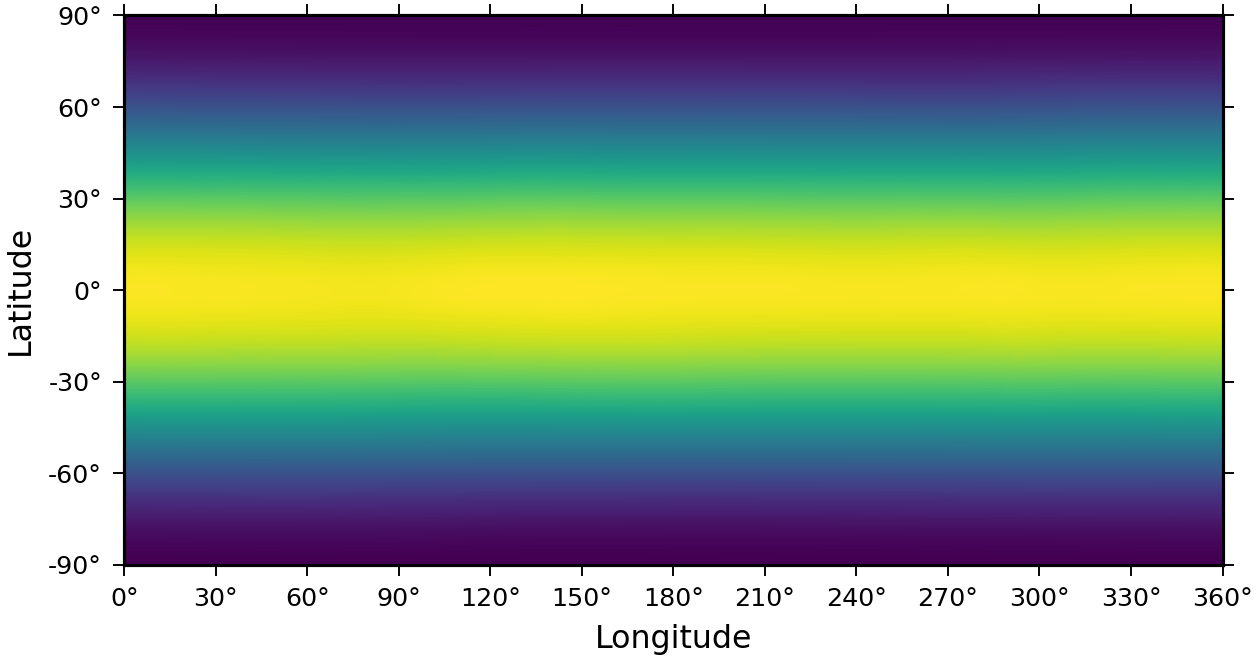

In [25]:
fig, ax = grid_eigen.plot(show=False)

In [26]:
import pyshtools as pysh

In [27]:
fname = '../data/ICGEM/EIGEN-6C4.gfc'
clmr, gm, r0, errors = pysh.shio.read_icgem_gfc(fname, errors='formal', encoding='iso-8859-1')

In [28]:
Clmr = pysh.SHCoeffs.from_array(clmr)

In [29]:
type(Clmr)

pyshtools.shclasses.shcoeffsgrid.SHRealCoeffs

In [30]:
print(gm, r0)

398600441500000.0 6378136.46


In [31]:
# print(clm.shape, clm)

AttributeError: 'SHRealCoeffs' object has no attribute 'shape'

In [32]:
print(errors.shape, errors)

(2, 2191, 2191) [[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [1.1081e-13 3.2499e-13 4.1742e-13 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  ...
  [1.9050e-14 1.9050e-14 1.9050e-14 ... 1.6020e-13 0.0000e+00 0.0000e+00]
  [5.7170e-15 5.7160e-15 5.7140e-15 ... 1.5960e-13 1.6020e-13 0.0000e+00]
  [5.7040e-15 5.7030e-15 5.7020e-15 ... 1.5900e-13 1.5960e-13 1.6010e-13]]

 [[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  [0.0000e+00 3.2870e-13 4.1594e-13 ... 0.0000e+00 0.0000e+00 0.0000e+00]
  ...
  [0.0000e+00 1.9050e-14 1.9050e-14 ... 1.6020e-13 0.0000e+00 0.0000e+00]
  [0.0000e+00 5.7160e-15 5.7140e-15 ... 1.5960e-13 1.6020e-13 0.0000e+00]
  [0.0000e+00 5.7030e-15 5.7020e-15 ... 1.5900e-13 1.5960e-13 1.6010e-13]]]


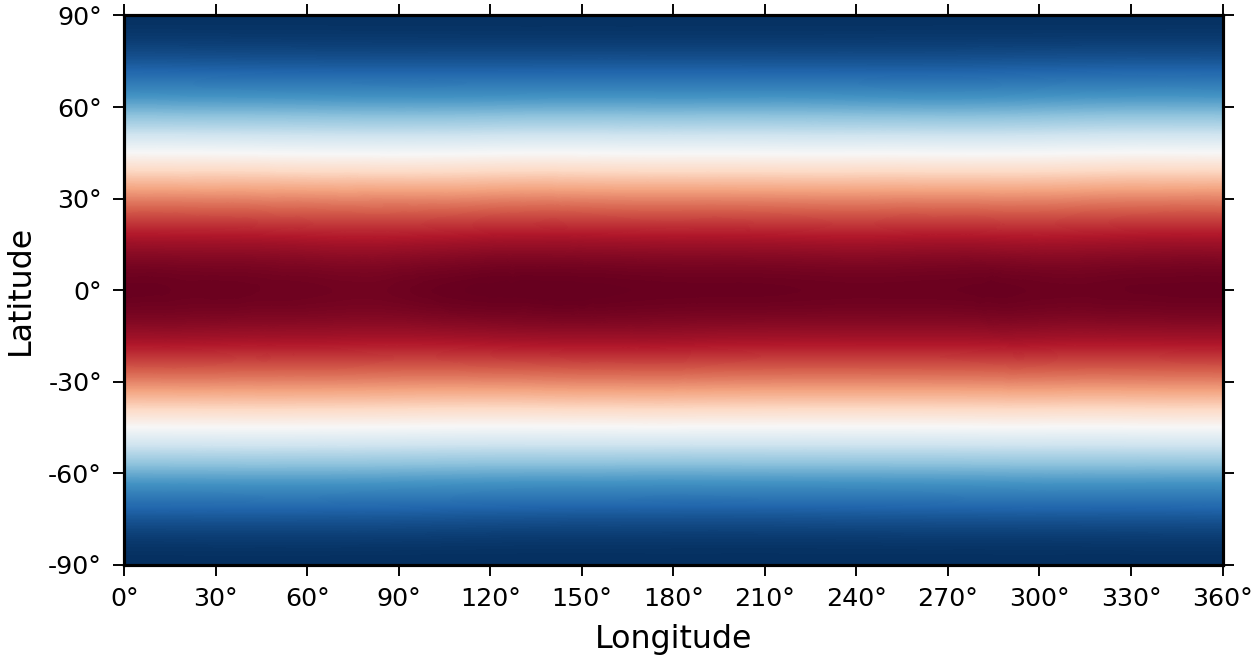

In [33]:
grid_eigen = Clmr.expand()
fig, ax = grid_eigen.plot(cmap='RdBu_r', show=False)

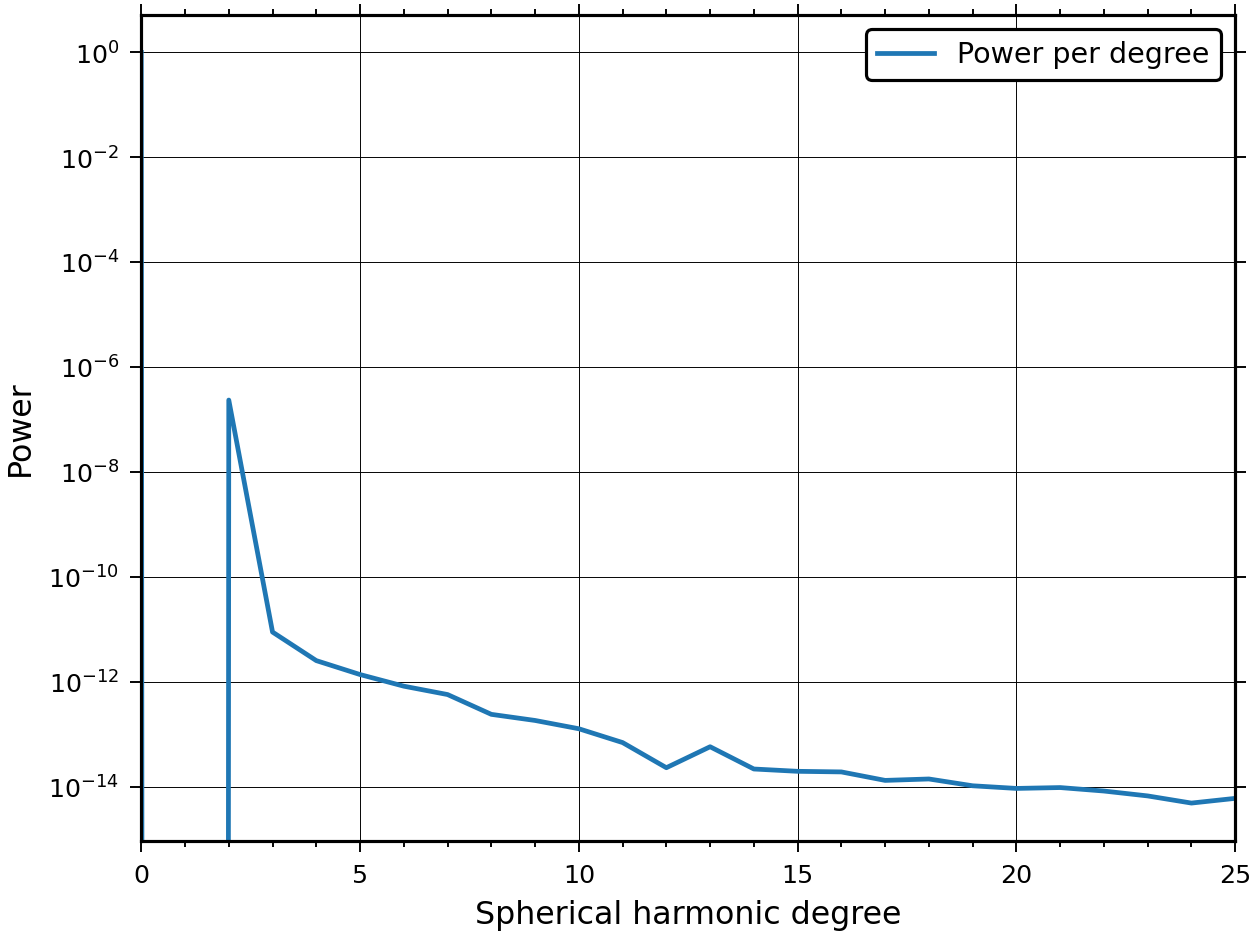

In [39]:
fig, ax = Clmr.plot_spectrum(lmax=25, show=False) 
# show=False is used to avoid a warning when plotting in inline mode

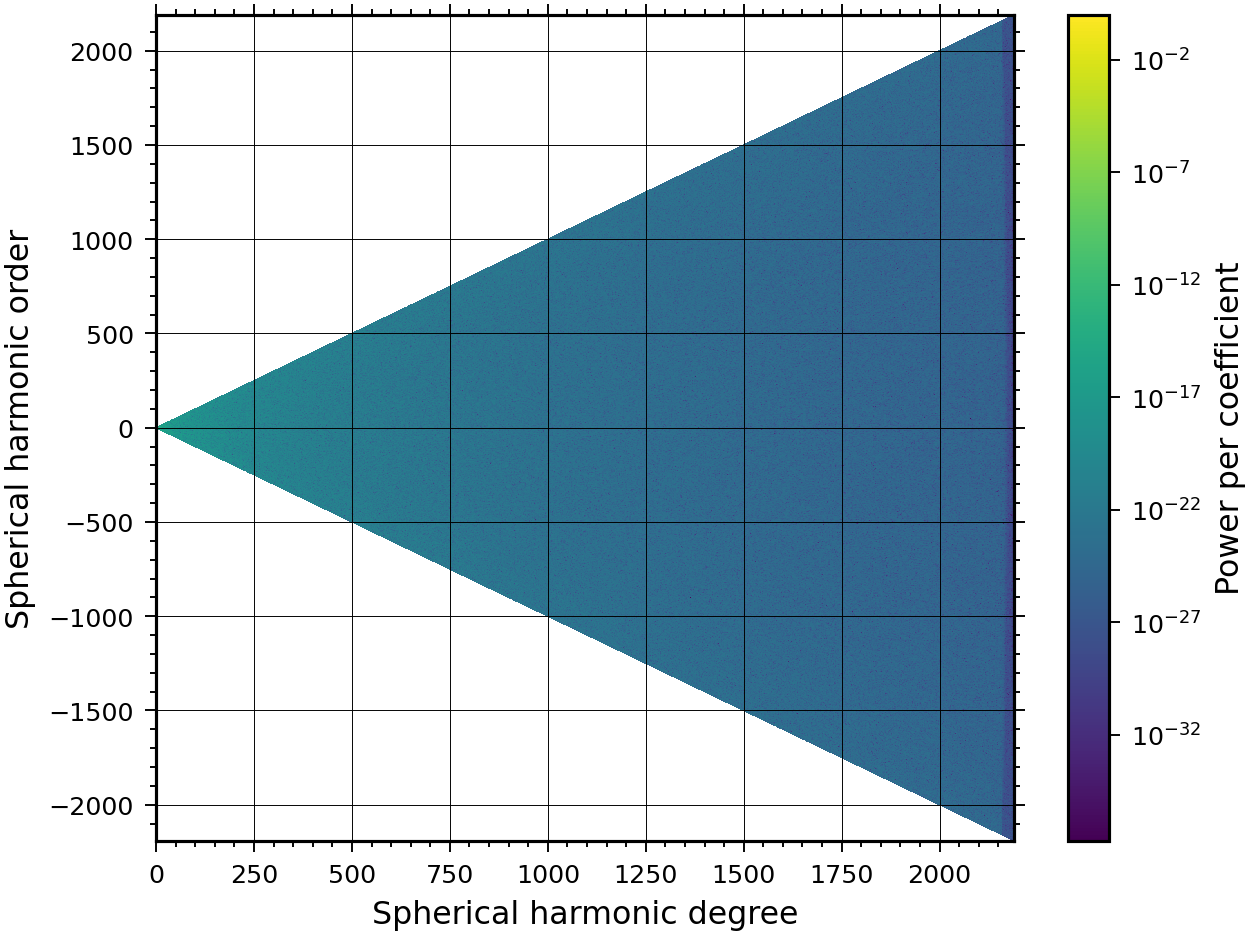

In [37]:
fig, ax = Clmr.plot_spectrum2d(show=False)